In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [153]:
df1=pd.read_csv("h1n1_vaccine_prediction.csv")
features = df1.iloc[:,:-1]
labels = df1.iloc[:,-1:]

In [154]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [155]:
labels.head()

,h1n1_vaccine
0,0
1,0
2,0
3,0
4,0


In [156]:
features.shape

(26707, 33)

In [157]:
labels.shape

(26707, 1)

In [158]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [159]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 208.8 KB


In [160]:
features.duplicated().sum()

0

In [161]:
labels.duplicated().sum()

26705

In [162]:
features.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [163]:
labels.isnull().sum()

h1n1_vaccine    0
dtype: int64

In [164]:
features = features.fillna(features.mean())
features = round(features)

features = features.fillna('No Category')

In [165]:
features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [166]:
enc = LabelEncoder()

In [167]:
features.age_bracket = enc.fit_transform(features.age_bracket)
features.qualification = enc.fit_transform(features.qualification)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_level = enc.fit_transform(features.income_level)
features.marital_status = enc.fit_transform(features.marital_status)
features.housing_status = enc.fit_transform(features.housing_status)
features.employment = enc.fit_transform(features.employment)
features.census_msa = enc.fit_transform(features.census_msa)

In [168]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [169]:
features.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,2,2,1,2,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,3,1,2,2,2,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,3,1,0,2,1,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,3,0,2,2,2,2,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4,3,0,0,0,1,0,0,1.0,0.0


In [170]:
features.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,2.057513,2.570300,0.406223,0.953795,0.932190,1.145542,0.984161,0.833489,0.887558,0.538922
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.435626,0.923226,0.491136,1.113444,0.970936,0.526582,1.052723,0.823313,0.749980,0.924918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000


In [171]:
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

<AxesSubplot:xlabel='no_of_adults'>

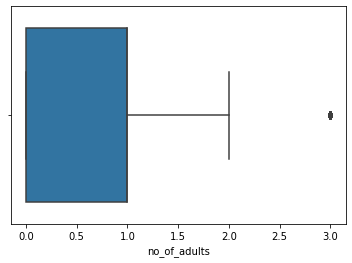

In [172]:
sns.boxplot(features.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

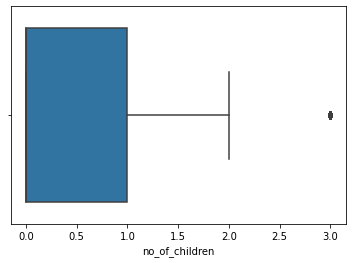

In [173]:
sns.boxplot(features.no_of_children)

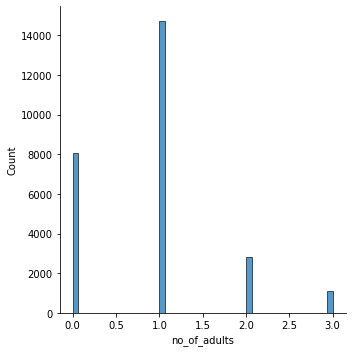

In [174]:
sns.displot(features.no_of_adults)

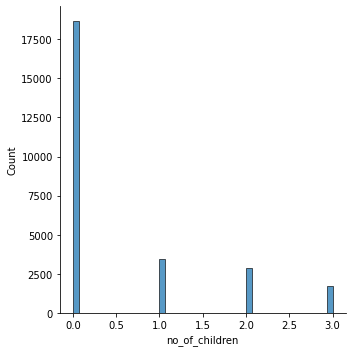

In [175]:
sns.displot(features.no_of_children)

In [176]:
features.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

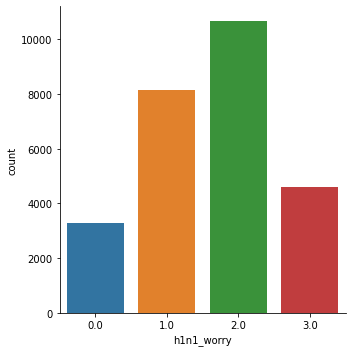

In [177]:
sns.factorplot('h1n1_worry', data = features, kind = "count")

In [178]:
features.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

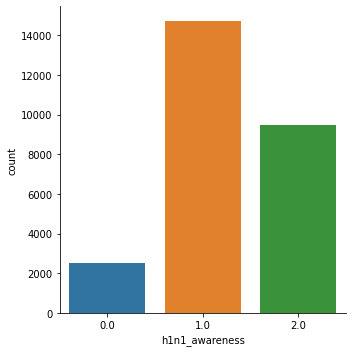

In [179]:
sns.factorplot('h1n1_awareness', data = features, kind = "count")

In [180]:
features.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

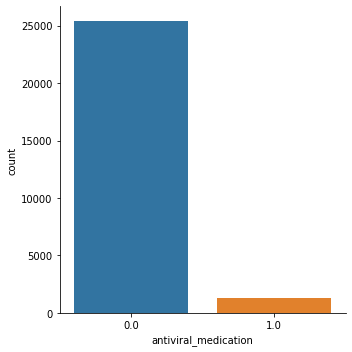

In [181]:
sns.factorplot('antiviral_medication', data = features, kind = "count")

In [182]:
features.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

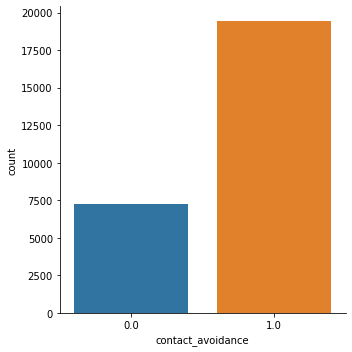

In [183]:
sns.factorplot('contact_avoidance', data = features, kind = "count")

In [184]:
features.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

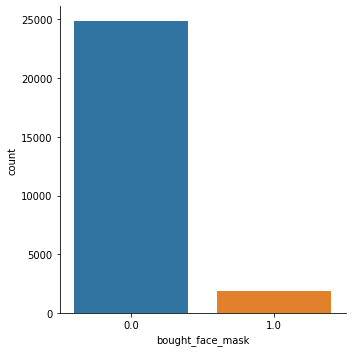

In [185]:
sns.factorplot('bought_face_mask', data = features, kind = "count")

In [186]:
features.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

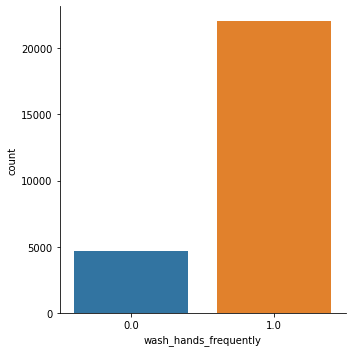

In [187]:
sns.factorplot('wash_hands_frequently', data = features, kind = "count")

In [188]:
features.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

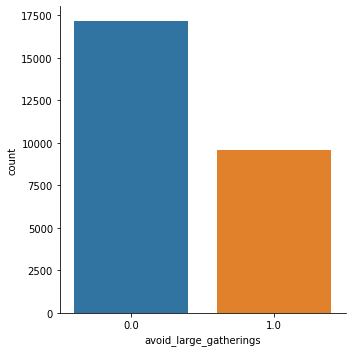

In [189]:
sns.factorplot('avoid_large_gatherings', data = features, kind = "count")

In [190]:
features.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

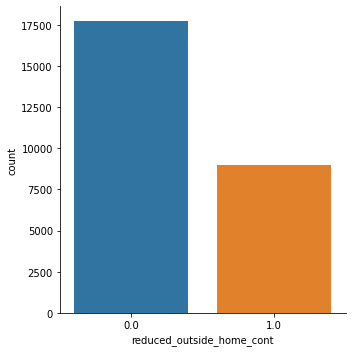

In [191]:
sns.factorplot('reduced_outside_home_cont', data = features, kind = "count")

In [192]:
features.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

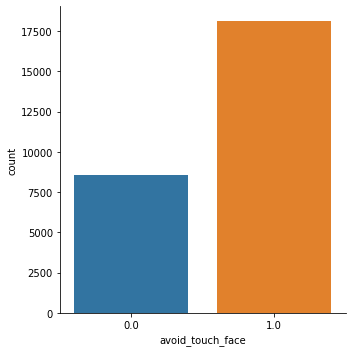

In [193]:
sns.factorplot('avoid_touch_face', data = features, kind = "count")

In [194]:
features.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

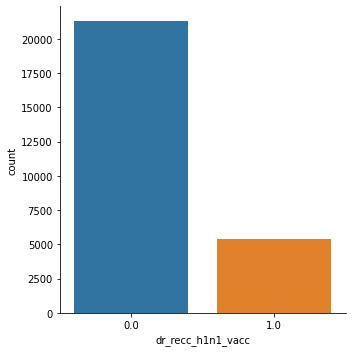

In [195]:
sns.factorplot('dr_recc_h1n1_vacc', data = features, kind = "count")

In [196]:
features.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

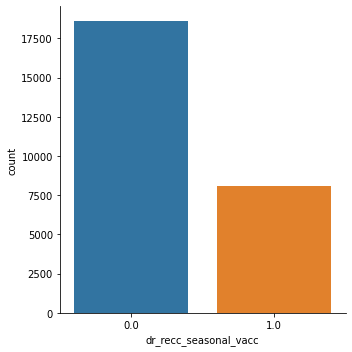

In [197]:
sns.factorplot('dr_recc_seasonal_vacc', data = features, kind = "count")

In [198]:
features.chronic_medic_condition .value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

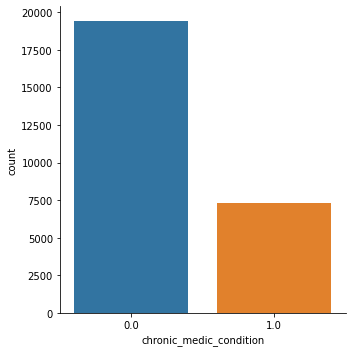

In [199]:
sns.factorplot('chronic_medic_condition', data = features, kind = "count")

In [200]:
features.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

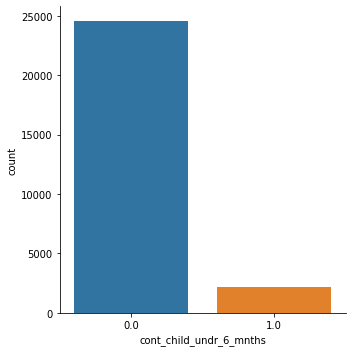

In [201]:
sns.factorplot('cont_child_undr_6_mnths', data = features, kind = "count")

In [202]:
features.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

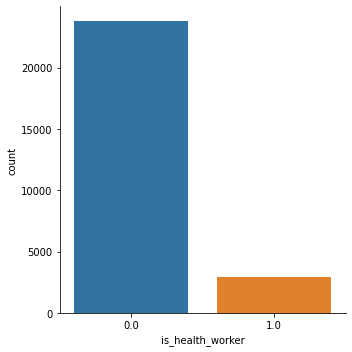

In [203]:
sns.factorplot('is_health_worker', data = features, kind = "count")

In [204]:
features.has_health_insur.value_counts()

1.0    24971
0.0     1736
Name: has_health_insur, dtype: int64

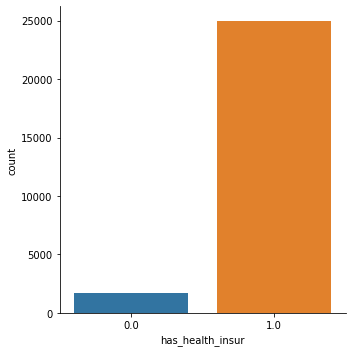

In [205]:
sns.factorplot('has_health_insur', data = features, kind = "count")

In [206]:
features.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

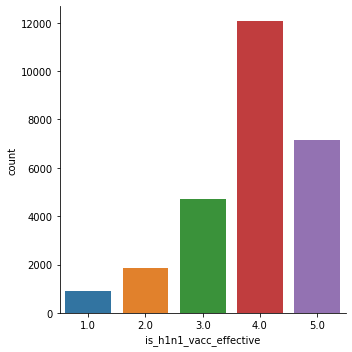

In [207]:
sns.factorplot('is_h1n1_vacc_effective', data = features, kind = "count")

In [208]:
features.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

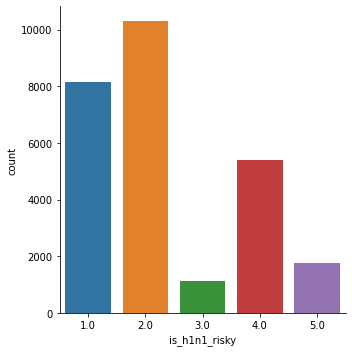

In [209]:
sns.factorplot('is_h1n1_risky', data = features, kind = "count")

In [210]:
features.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

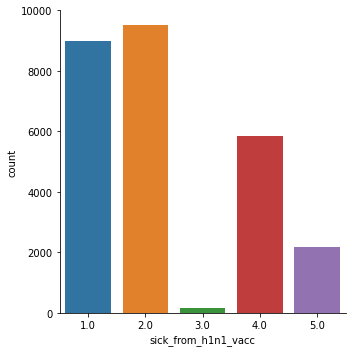

In [211]:
sns.factorplot('sick_from_h1n1_vacc', data = features, kind = "count")

In [212]:
features.is_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

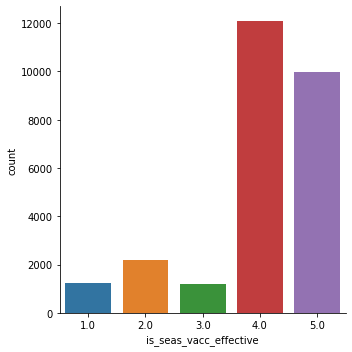

In [213]:
sns.factorplot('is_seas_vacc_effective', data = features, kind = "count")

In [214]:
features.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: is_seas_risky, dtype: int64

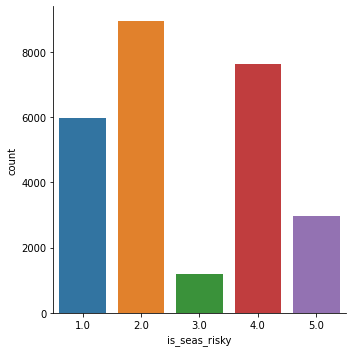

In [215]:
sns.factorplot('is_seas_risky', data = features, kind = "count")

In [216]:
features.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

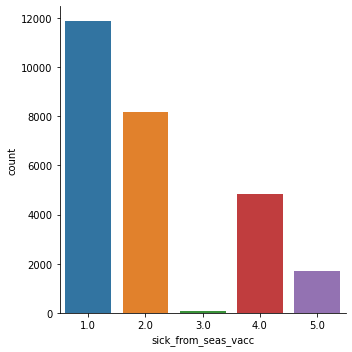

In [217]:
sns.factorplot('sick_from_seas_vacc', data = features, kind = "count")

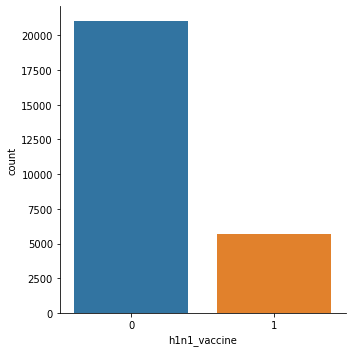

In [218]:
sns.factorplot('h1n1_vaccine', data = labels, kind = "count")

In [219]:
std_scale = MinMaxScaler()
features = std_scale.fit_transform(features)

In [220]:
features = pd.DataFrame(features)
col_name = ['unique_id','h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths', 'is_health_worker',
       'has_health_insur', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket',
       'qualification', 'race', 'sex', 'income_level', 'marital_status',
       'housing_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children']
features.columns = col_name

In [221]:
features.corrwith(labels.h1n1_vaccine)

unique_id                   -0.003280
h1n1_worry                   0.121574
h1n1_awareness               0.117771
antiviral_medication         0.040226
contact_avoidance            0.046837
bought_face_mask             0.070413
wash_hands_frequently        0.074570
avoid_large_gatherings       0.018089
reduced_outside_home_cont    0.022080
avoid_touch_face             0.070855
dr_recc_h1n1_vacc            0.394086
dr_recc_seasonal_vacc        0.218976
chronic_medic_condition      0.094360
cont_child_undr_6_mnths      0.066712
is_health_worker             0.168056
has_health_insur             0.041891
is_h1n1_vacc_effective       0.267352
is_h1n1_risky                0.320580
sick_from_h1n1_vacc          0.074580
is_seas_vacc_effective       0.177799
is_seas_risky                0.255955
sick_from_seas_vacc          0.008415
age_bracket                  0.041074
qualification                0.020766
race                         0.041061
sex                         -0.020672
income_level

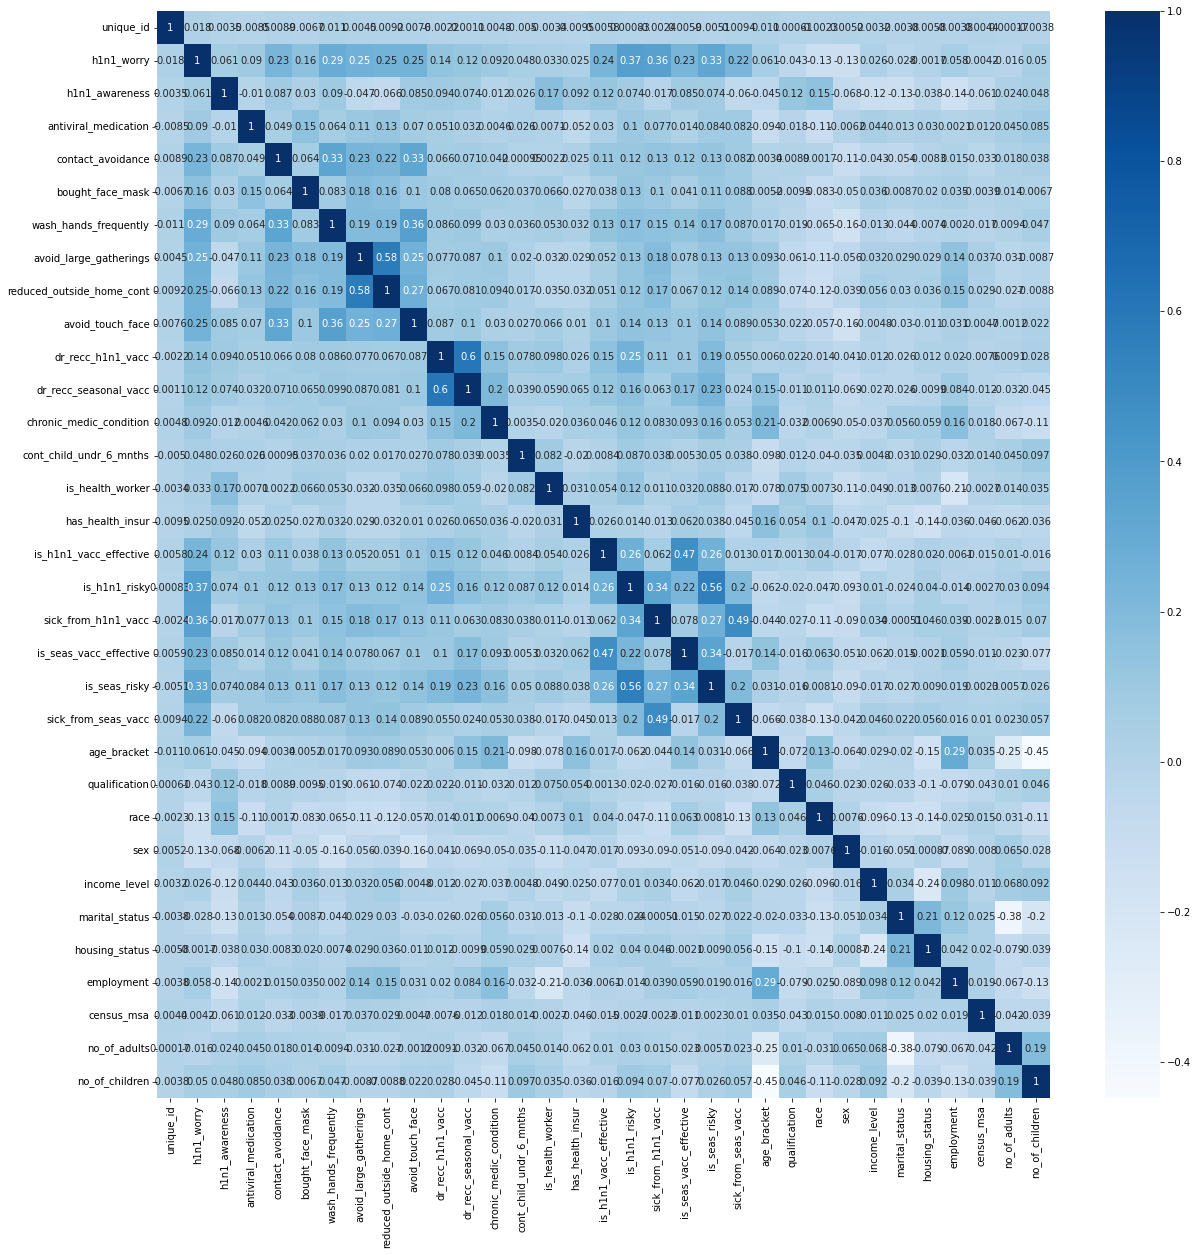

In [222]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

In [223]:
features.drop(['sick_from_seas_vacc','census_msa',
               'no_of_adults','no_of_children','antiviral_medication',
               'qualification'], axis = 1, inplace = True)

In [224]:
X = features
y = labels

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

In [226]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [227]:
model_lr.score(X_train,y_train)

0.833529474697764

In [228]:
model_lr.score(X_test,y_test)

0.836890053662798

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
model=DecisionTreeClassifier(max_depth=10,criterion="entropy")
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [260]:
model.score(X_train,y_train)

0.8680325238044292

In [261]:
model.score(X_test,y_test)

0.8212904030949707

In [262]:
from sklearn.ensemble import BaggingClassifier

In [311]:
model_bc=BaggingClassifier(n_estimators=100,base_estimator=model,random_state=23,max_features=0.89)
model_bc=model_bc.fit(X_train,y_train)

In [312]:
model_bc.score(X_train,y_train)

0.8877714774794051

In [313]:
model_bc.score(X_test,y_test)

0.8352676900037439

In [295]:
from sklearn.ensemble import AdaBoostClassifier

In [334]:
model_abc=AdaBoostClassifier(n_estimators=150,random_state=23)
model_abc=model_abc.fit(X_train,y_train)

In [335]:
model_abc.score(X_train,y_train)

0.8349737883812988

In [336]:
model_abc.score(X_test,y_test)

0.8341445151628604

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

In [350]:
model_gc=GradientBoostingClassifier(n_estimators=100,random_state=23,max_depth=6,min_samples_leaf=3)
model_gc=model_gc.fit(X_train,y_train)

In [351]:
model_gc.score(X_train,y_train)

0.881726757248315

In [352]:
model_gc.score(X_test,y_test)

0.8381380257082242

In [353]:
from sklearn.ensemble import RandomForestClassifier

In [374]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=23, max_features='log2', max_depth=11)
model_rf=model_rf.fit(X_train,y_train)

In [375]:
model_rf.score(X_train,y_train)

0.885952712100139

In [376]:
model_rf.score(X_test,y_test)

0.8381380257082242